#Diet Analysis , Predict The Weight

# Instructions

#Task1: Data Preprocessing

* Examine Data Types
* Feature Engineering
* Check for Missing Values and Outliers
* Scaling.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('weight_change_dataset.csv')
df.head()

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,M,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8
2,3,32,F,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2
3,4,25,F,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3
4,5,38,M,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5


In [ ]:
#Getting the shape
df.shape

(100, 13)

In [ ]:
#Getting the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Participant ID                 100 non-null    int64  
 1   Age                            100 non-null    int64  
 2   Gender                         100 non-null    object 
 3   Current Weight (lbs)           100 non-null    float64
 4   BMR (Calories)                 100 non-null    float64
 5   Daily Calories Consumed        100 non-null    float64
 6   Daily Caloric Surplus/Deficit  100 non-null    float64
 7   Weight Change (lbs)            100 non-null    float64
 8   Duration (weeks)               100 non-null    int64  
 9   Physical Activity Level        100 non-null    object 
 10  Sleep Quality                  100 non-null    object 
 11  Stress Level                   100 non-null    int64  
 12  Final Weight (lbs)             100 non-null    floa

In [ ]:
#Getting the Null values
df.isnull().sum()

,0
Participant ID,0
Age,0
Gender,0
Current Weight (lbs),0
BMR (Calories),0
Daily Calories Consumed,0
Daily Caloric Surplus/Deficit,0
Weight Change (lbs),0
Duration (weeks),0
Physical Activity Level,0


In [ ]:
#Getting the duplicates
df.duplicated().sum()

0

* Since the data is already cleaned, we can dive straight into the preprocessing

In [ ]:
#dropping columns that are not important
df.drop(columns=['Participant ID', 'Final Weight (lbs)'], inplace = True)

In [ ]:
#creating new columns
df['Caloric Intake Per Weight']  = df['Daily Calories Consumed'] / df['Current Weight (lbs)']
# mapping of common activities to their respective MET values
met_value_map = {
    'Sedentary' : 1.2,
    'Lightly Active' : 1.375,
    'Moderately Active' : 1.55,
    'Very Active' : 1.9
}
# here we have applied the mapping on the Physical Activity Level and created new colum for MET values
df['Physical Activity MET Value'] = df['Physical Activity Level'].map(met_value_map)
# using MET value and BMR we have calculated and created a new column Activity Weighted Calories
df['Activity Weighted Calories'] = df['Physical Activity MET Value'] * df['BMR (Calories)']

# Task2: Exploratory Data Analysis (EDA)

* Visualize Feature Distributions
* Analyze Relationships
* Target Variable Analysis

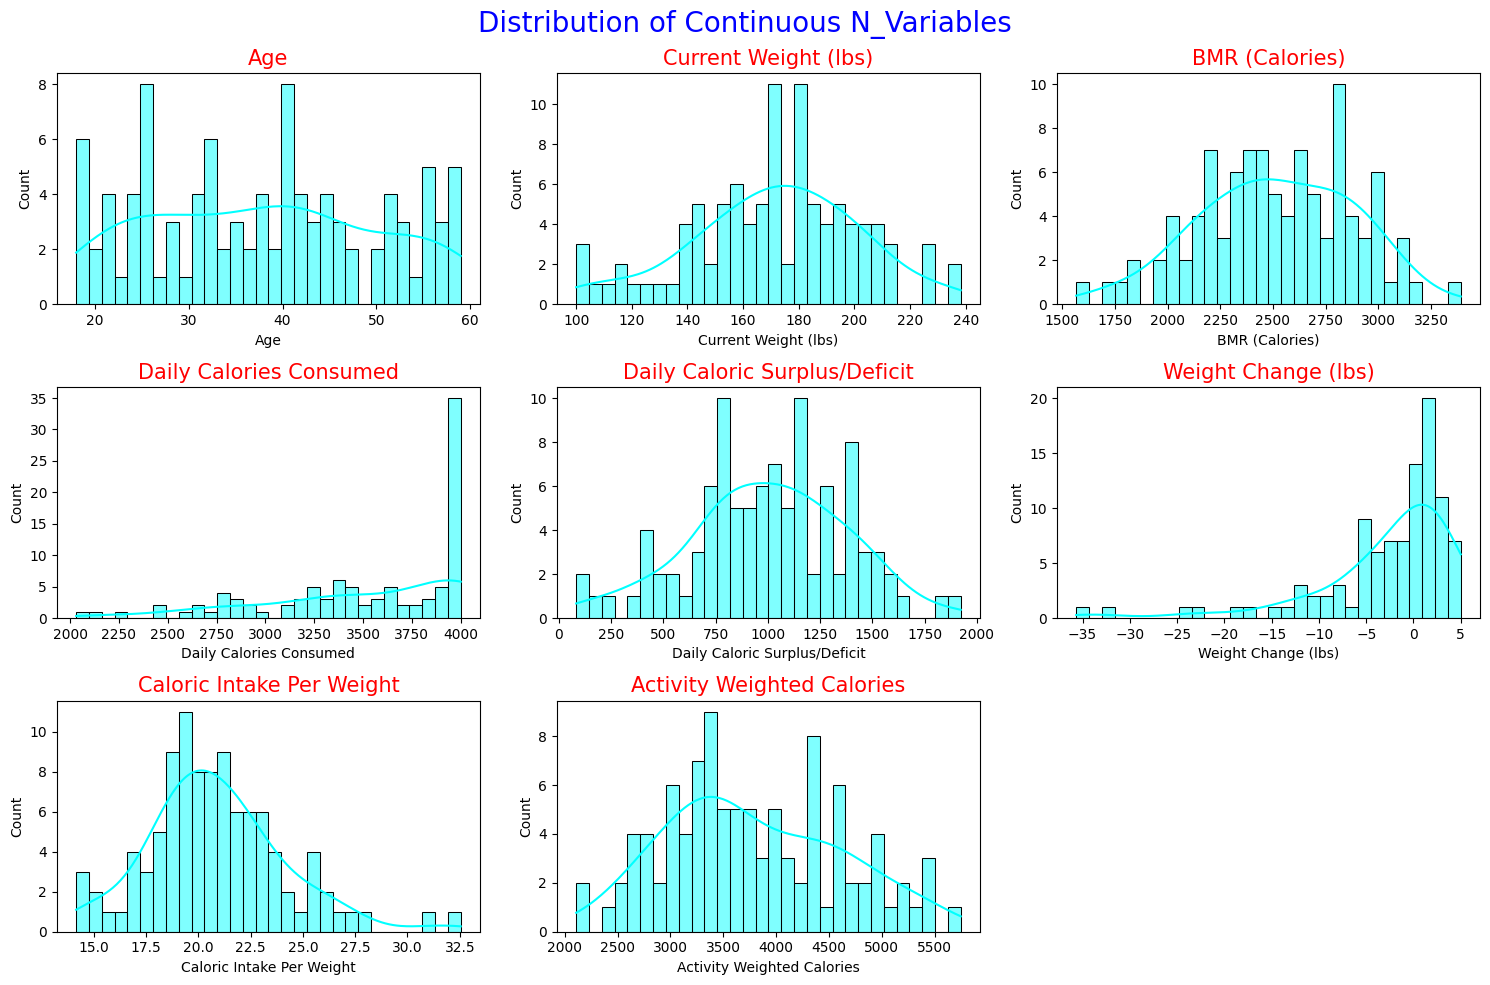

In [ ]:
#chech the distribution of continuous number columns

conti_num_cols = ['Age','Current Weight (lbs)','BMR (Calories)','Daily Calories Consumed','Daily Caloric Surplus/Deficit','Weight Change (lbs)','Caloric Intake Per Weight','Activity Weighted Calories']

plt.figure(figsize=(15,10))
pt = 1

for col in conti_num_cols:
    plt.subplot(3,3, pt)
    sns.histplot(df[col], kde = True, bins = 30, color = 'cyan', edgecolor = 'black')
    plt.title(col, fontsize = 15, color = 'red')
    pt+=1

plt.suptitle('Distribution of Continuous N_Variables', fontsize=20, color='blue')
plt.tight_layout()
plt.show()

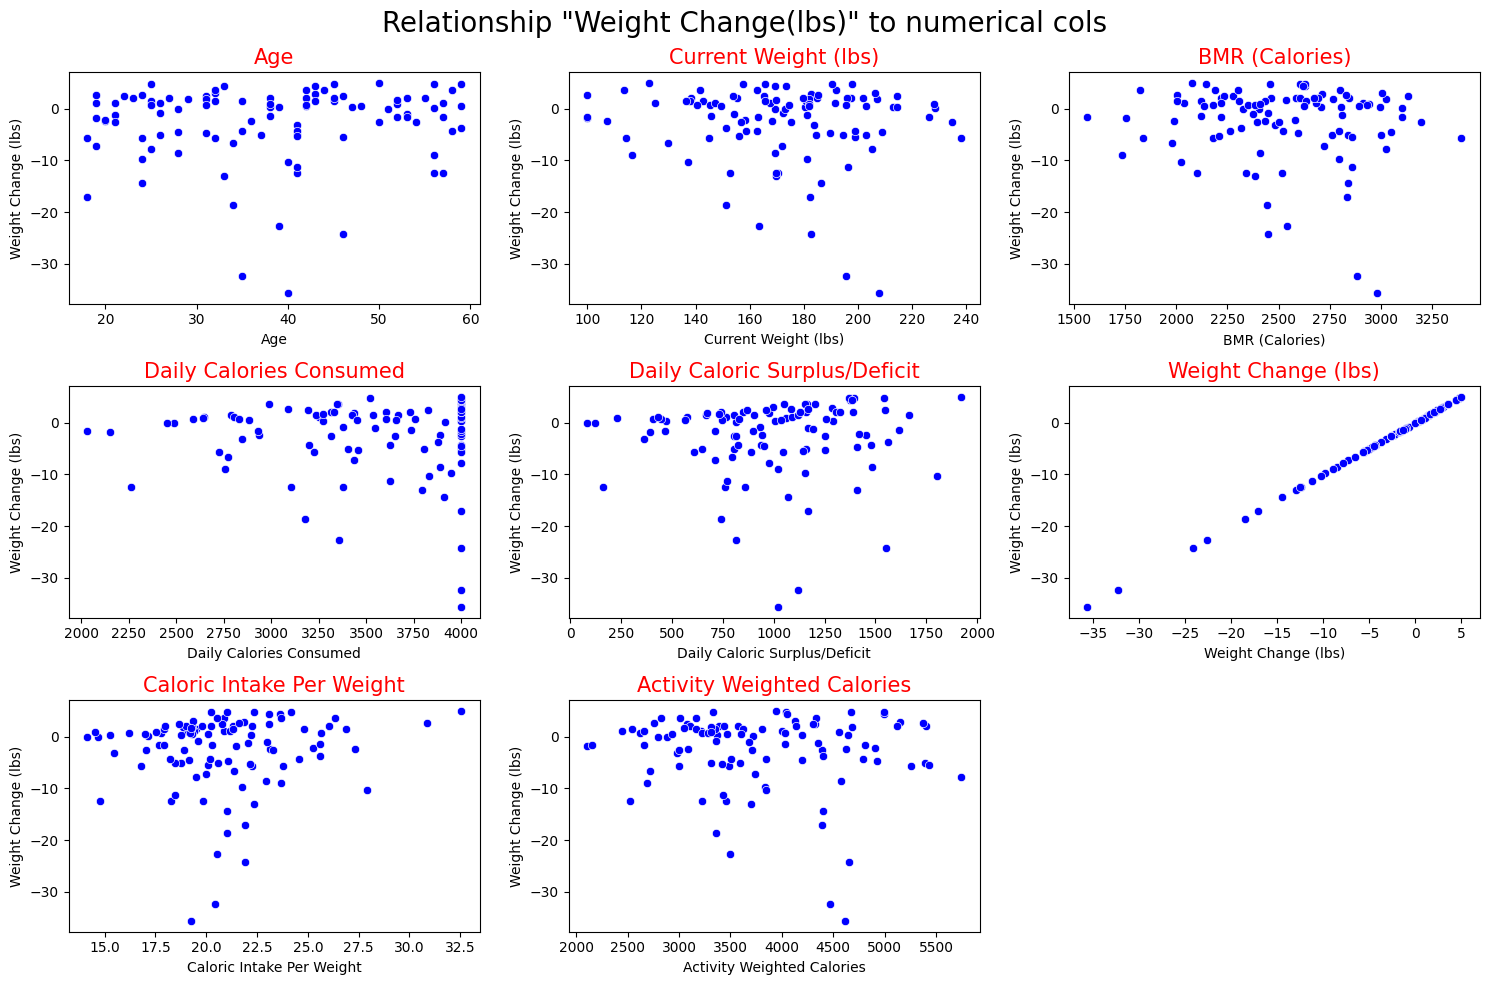

In [ ]:
plt.figure(figsize = (15, 10))
pt = 1

for col in conti_num_cols:
    plt.subplot(3,3, pt)
    sns.scatterplot(x = col, y = 'Weight Change (lbs)', data=df, color = 'blue', edgecolor = 'white')
    plt.title(col, fontsize = 15, color = 'red')
    pt+=1

plt.suptitle('Relationship "Weight Change(lbs)" to numerical cols', fontsize=20, color='black')
plt.tight_layout()
plt.show()

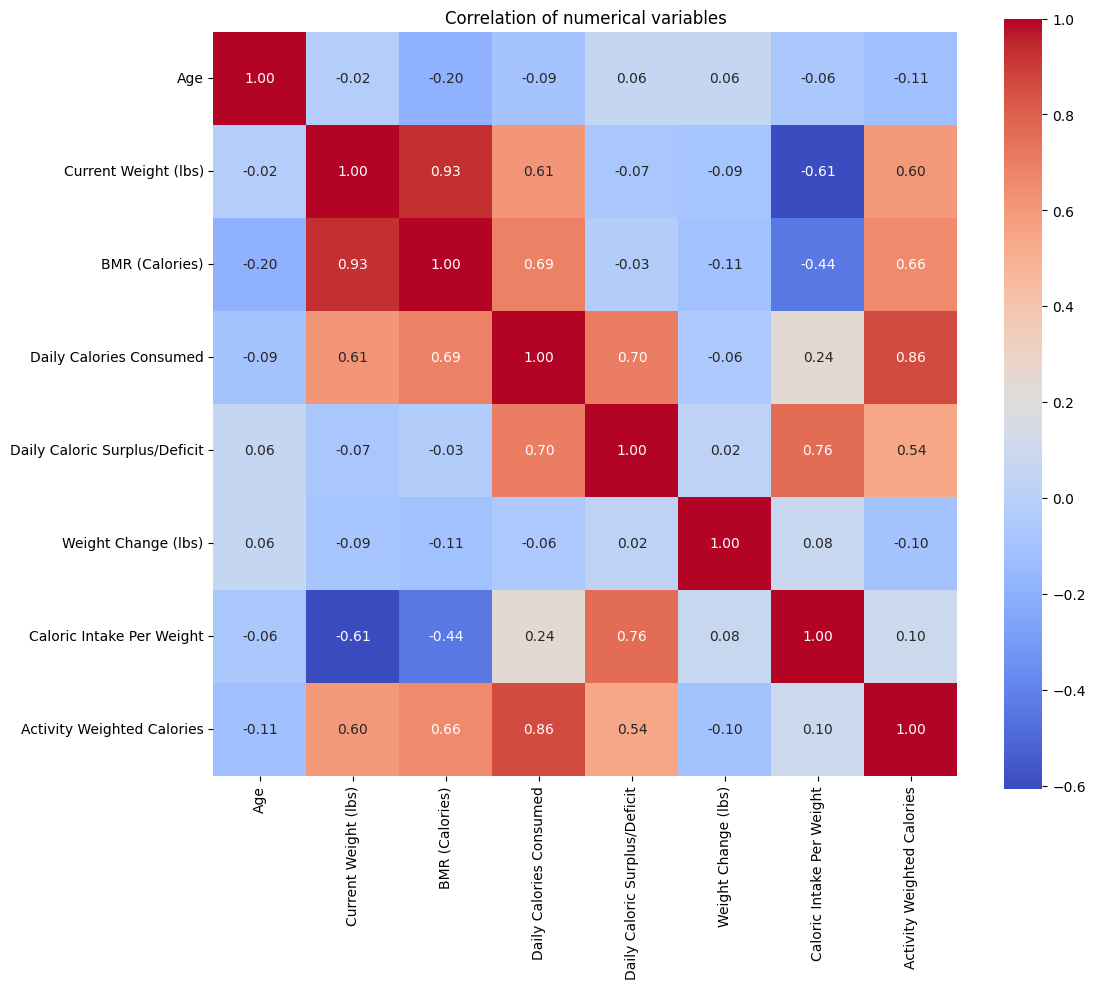

In [ ]:
# Calculate the correlation matrix
correlation = df[conti_num_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation of numerical variables")
plt.show()

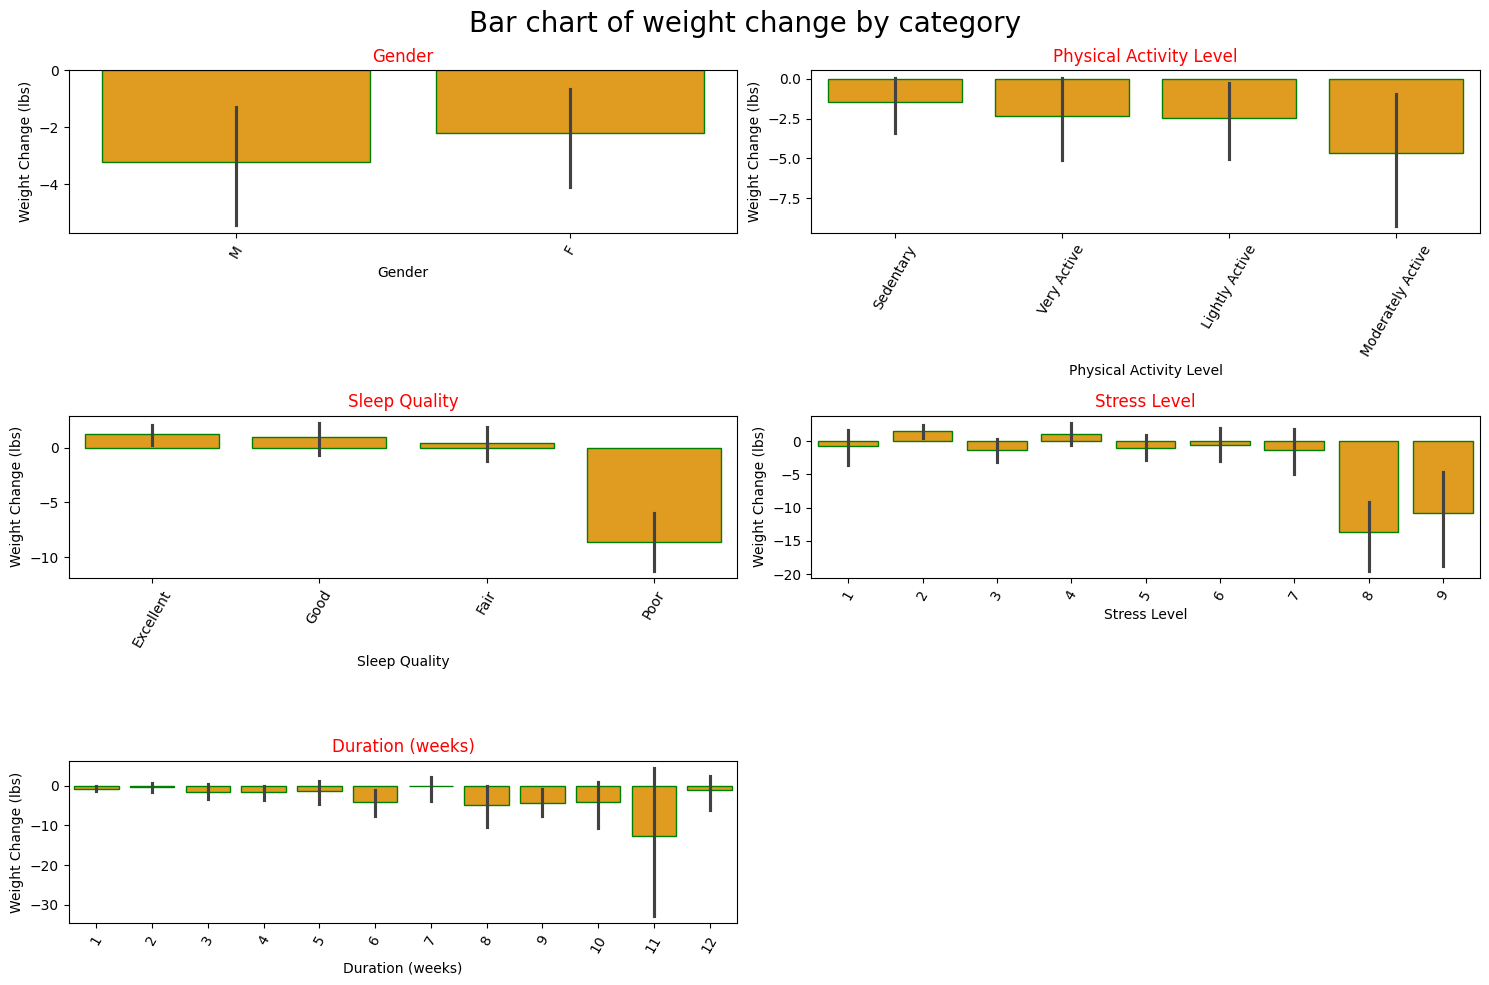

In [ ]:
# Visualizing how categorical variables correlating with average Weight Change

categorical_cols = ['Gender', 'Physical Activity Level', 'Sleep Quality', 'Stress Level', 'Duration (weeks)']
plt.figure(figsize = (15, 10))
pt = 1
for col in categorical_cols:
    plt.subplot(3,2, pt)
    sns.barplot(x = col, y = 'Weight Change (lbs)', data=df, color = 'orange', edgecolor = 'green')
    plt.xticks(rotation = 60)
    plt.title(col, fontsize = 12, color = 'red')
    pt+=1

plt.suptitle('Bar chart of weight change by category', fontsize=20, color='black')
plt.tight_layout()
plt.show()

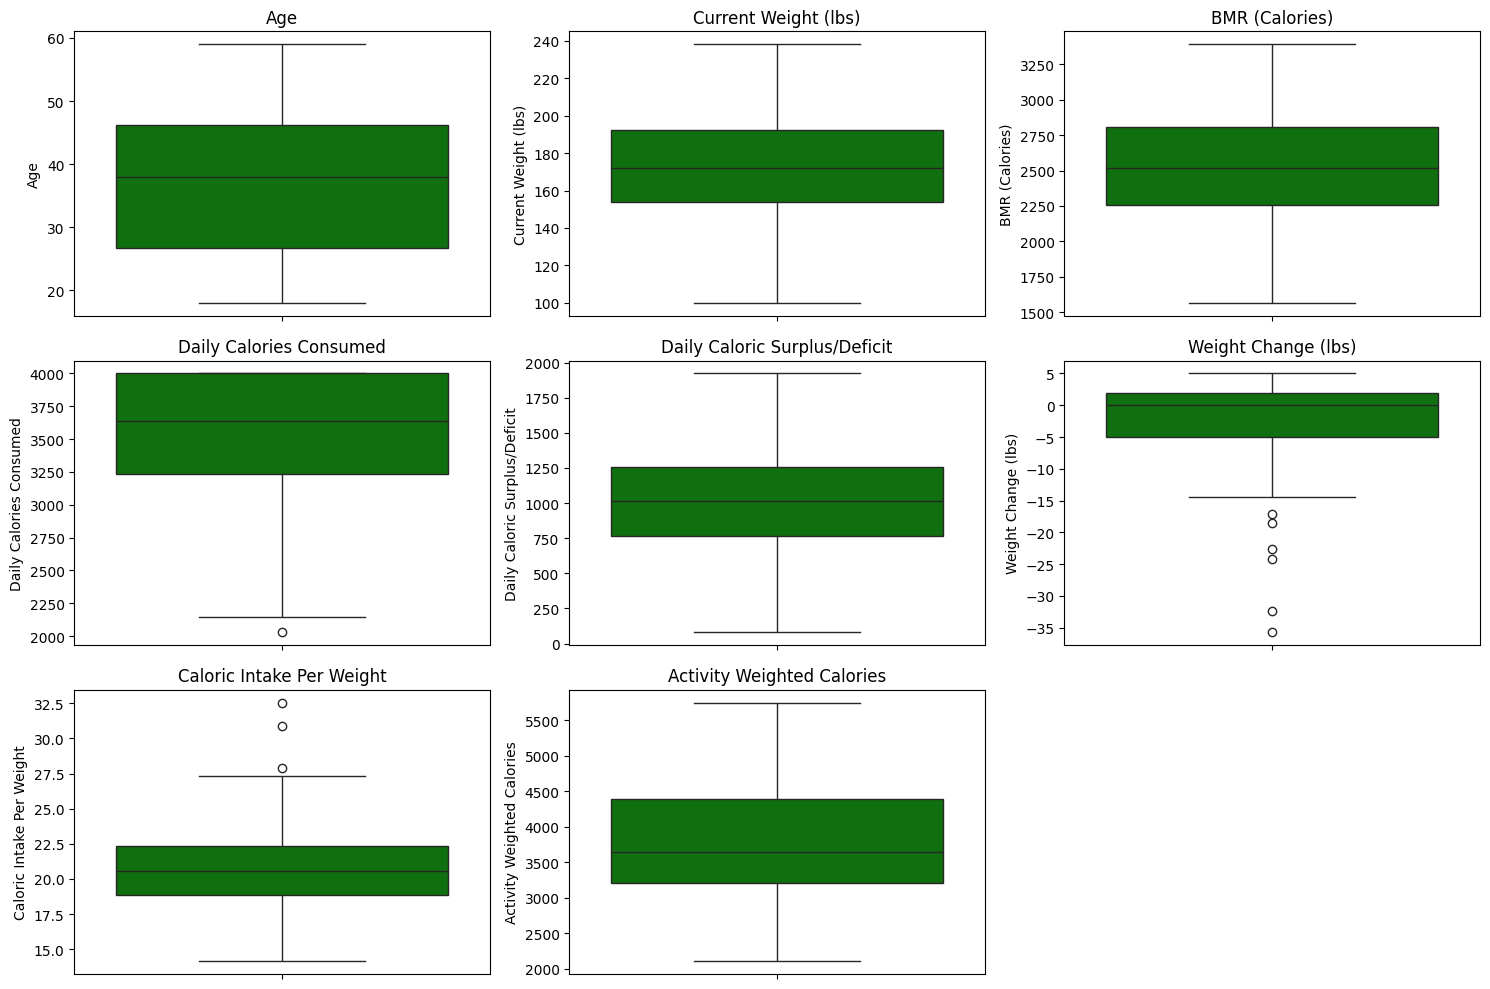

In [ ]:
#Visualize outliers Using Box plot in continuous columns
plt.figure(figsize = (15, 10))
pt = 1
for col in conti_num_cols:
    plt.subplot(3, 3, pt)
    sns.boxplot(df[col], color = 'green')
    plt.title(col)
    pt+=1

plt.tight_layout()
plt.show()

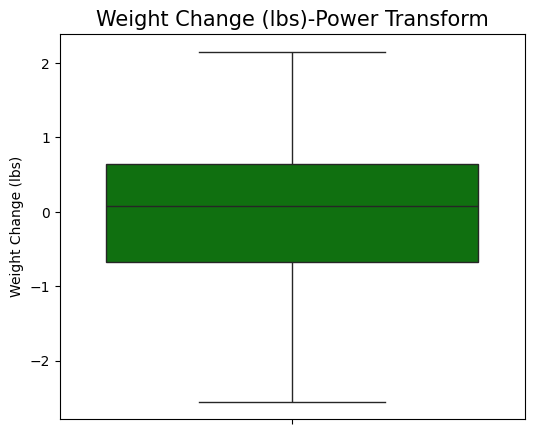

In [ ]:
#
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df['Weight Change (lbs)'] = pt.fit_transform(df[['Weight Change (lbs)']])

# Plotting after transformation
plt.figure(figsize=(6, 5))
sns.boxplot(df['Weight Change (lbs)'], color='green')
plt.title('Weight Change (lbs)-Power Transform', fontsize=15, color='black')
plt.show()

# Task3: Model Selection

* Split the Dataset
* Model Training

In [ ]:
cs = df.drop(columns=['Caloric Intake Per Weight','BMR (Calories)','Physical Activity Level','Physical Activity MET Value'])
cs.columns

Index(['Age', 'Gender', 'Current Weight (lbs)', 'Daily Calories Consumed',
       'Daily Caloric Surplus/Deficit', 'Weight Change (lbs)',
       'Duration (weeks)', 'Sleep Quality', 'Stress Level',
       'Activity Weighted Calories'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
# Drop the target column from the feature set
X = cs.drop(columns=['Weight Change (lbs)'])

# Define the target variable
y = cs['Weight Change (lbs)']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the train and test sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (80, 9)
Testing set shape: (20, 9)


In [ ]:
# Encoding the categorical columns 'Gender' and 'Sleep Quality'
from sklearn.preprocessing import LabelEncoder
cat_cols = ['Gender', 'Sleep Quality']

gen_encode = LabelEncoder()
X_train['Gender'] = gen_encode.fit_transform(X_train['Gender'])
X_test['Gender'] = gen_encode.transform(X_test['Gender'])

sleep_encode = LabelEncoder()
X_train['Sleep Quality'] = sleep_encode.fit_transform(X_train['Sleep Quality'])
X_test['Sleep Quality'] = sleep_encode.transform(X_test['Sleep Quality'])

In [ ]:
X_train.head()

,Age,Gender,Current Weight (lbs),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Duration (weeks),Sleep Quality,Stress Level,Activity Weighted Calories
55,23,0,185.0,3327.8,740.8,10,2,3,3104.4000
88,28,1,209.0,4000.0,951.1,10,3,3,4192.2375
26,44,1,191.8,4000.0,1202.9,12,1,1,4335.5050
42,43,1,182.8,4000.0,1287.8,7,2,2,5153.1800
69,40,0,137.2,3827.8,1804.5,9,3,1,3844.2700


In [ ]:
# Creating an instance of all regressor models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

mlr = LinearRegression()
dtr = DecisionTreeRegressor(random_state=1)
gbr = GradientBoostingRegressor()

In [ ]:
model = {'Linear Regressor': mlr,
       'Decision Tree Regressor': dtr,
       'Gradient Boosting Regressor' : gbr,
       }

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

all_models = {}
for name, reg in model.items():
    model = reg.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    adj_r2 = 1 - ((1- score )* (X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] -1))
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    all_models[name] = score, adj_r2, mae, mse, rmse

In [ ]:
# making a table for models scores
pd.DataFrame(all_models, index = ['R2-Score', 'Adj_R2', 'MAE', 'MSE', 'RMSE'])

,Linear Regressor,Decision Tree Regressor,Gradient Boosting Regressor
R2-Score,0.242713,0.898584,0.874677
Adj_R2,-0.438845,0.807311,0.761886
MAE,0.481131,0.195354,0.216610
MSE,0.473570,0.063420,0.078371
RMSE,0.688164,0.251834,0.279948


* Underfitting: Linear Regressor (poor performance, low R², negative adjusted R²).
* Overfitting: Decision Tree Regressor (very high R², likely overfitting the training data).
* Perfect Fit: Gradient Boosting Regressor (high performance and generalization ability).

In [ ]:
#Best model out of all 3
best_model = GradientBoostingRegressor()
print('GradientBoost model Performance')
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
score = r2_score(y_test, y_pred)
adj_r2 = 1 - ((1- score )* (X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] -1))
print('R2:', score)
print('Adj_R2', adj_r2)

GradientBoost model Performance
R2: 0.878305334287897
Adj_R2 0.7687801351470044


In [ ]:
# Feature importance
print(best_model.feature_importances_ * 100)

[1.26287998e+00 8.92288495e-05 1.08545508e+00 9.92734054e-01
 9.21947326e+00 1.36143355e+01 5.15348361e+01 2.13469517e+01
 9.43245112e-01]


#Task4: Model Evaluation and Optimization

* Evaluate Models
* Hyperparameter Tuning
* Feature Importance

In [ ]:
evaluation = pd.DataFrame(X_train.columns.to_list(), columns = ['Features'])
evaluation['Importance %'] = best_model.feature_importances_ * 100
evaluation.sort_values(by = 'Importance %', ascending=False)

,Features,Importance %
6,Sleep Quality,51.534836
7,Stress Level,21.346952
5,Duration (weeks),13.614336
4,Daily Caloric Surplus/Deficit,9.219473
0,Age,1.262880
2,Current Weight (lbs),1.085455
3,Daily Calories Consumed,0.992734
8,Activity Weighted Calories,0.943245
1,Gender,0.000089


In [ ]:
X_train = X_train.drop(columns = ['Age', 'Gender'])
X_test = X_test.drop(columns = ['Age', 'Gender'])

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators' : [100, 200, 300],
    'learning_rate' : [0.01, 0.1, 0.05, 0.2],
    'max_depth' : [3, 4, 5],
    'subsample' : [0.08, 0.9, 1.0],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1,2,4]
}

gbr = GradientBoostingRegressor()

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.08, 0.9, 1.0]},
             verbose=3)

In [ ]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300,
 'subsample': 0.9}

In [ ]:
optimized_model = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 4,min_samples_leaf= 2, min_samples_split= 2,
                          n_estimators= 200, subsample= 0.9)
optimized_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=2, n_estimators=200,
                          subsample=0.9)

In [ ]:
y_pred_tuned = optimized_model.predict(X_train)
# Evaluate the model on training data
score = r2_score(y_train, y_pred_tuned)
adj_r2 = 1 - ((1- score )* (X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] -1))
mae = mean_absolute_error(y_train, y_pred_tuned)
mse = mean_squared_error(y_train, y_pred_tuned)
rmse = np.sqrt(mse)

print('R2 score:', score)
print('Adjusted R2 score', adj_r2)
print('Mean Squared Error:', mae)
print('Mean Absolute Error:', mse)
print('Root-Mean Squared Error:', rmse)

R2 score: 0.9999972484280177
Adjusted R2 score 0.999996980914075
Mean Squared Error: 0.0012279277680292328
Mean Absolute Error: 3.0019943506386775e-06
Root-Mean Squared Error: 0.001732626431357515


In [ ]:
y_pred_tuned = optimized_model.predict(X_test)
# Evaluate the model on testing data
score = r2_score(y_test, y_pred_tuned)
adj_r2 = 1 - ((1- score )* (X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] -1))
mae = mean_absolute_error(y_test, y_pred_tuned)
mse = mean_squared_error(y_test, y_pred_tuned)
rmse = np.sqrt(mse)

print('R2 score:', score)
print('Adjusted R2 score', adj_r2)
print('Mean Squared Error:', mae)
print('Mean Absolute Error:', mse)
print('Root-Mean Squared Error:', rmse)

R2 score: 0.894599580719131
Adjusted R2 score 0.8331160028052909
Mean Squared Error: 0.1790738249013207
Mean Absolute Error: 0.06591229127664773
Root-Mean Squared Error: 0.25673389195166213


In [ ]:
evaluation = pd.DataFrame(X_train.columns.to_list(), columns = ['Features'])
evaluation['Importance %'] = optimized_model.feature_importances_ * 100
evaluation = evaluation.sort_values(by = 'Importance %', ascending=False)
evaluation

,Features,Importance %
4,Sleep Quality,50.907275
5,Stress Level,21.901317
3,Duration (weeks),13.413133
2,Daily Caloric Surplus/Deficit,11.047316
6,Activity Weighted Calories,1.157397
1,Daily Calories Consumed,0.876788
0,Current Weight (lbs),0.696774


In [ ]:
def predict_weight_change(cs):
    pred = optimized_model.predict(cs)
    # inverse transform the prediction to the original scale
    original_pred = pt.inverse_transform(pred.reshape(-1, 1))
    return original_pred

In [ ]:
actual = pt.inverse_transform(y_test.to_numpy().reshape(-1, 1))
review = pd.DataFrame(actual, columns = ['Actual Value'])
review['Predicted'] = predict_weight_change(X_test)
review

,Actual Value,Predicted
0,1.200000,0.859894
1,-1.135826,-4.422623
2,-1.658347,-4.529442
3,4.800000,4.666602
4,-4.988028,-5.869362
5,3.600000,2.624961
6,-2.623361,-3.578452
7,-5.718496,-5.877729
8,-5.028299,-4.844528
9,0.200000,0.489442


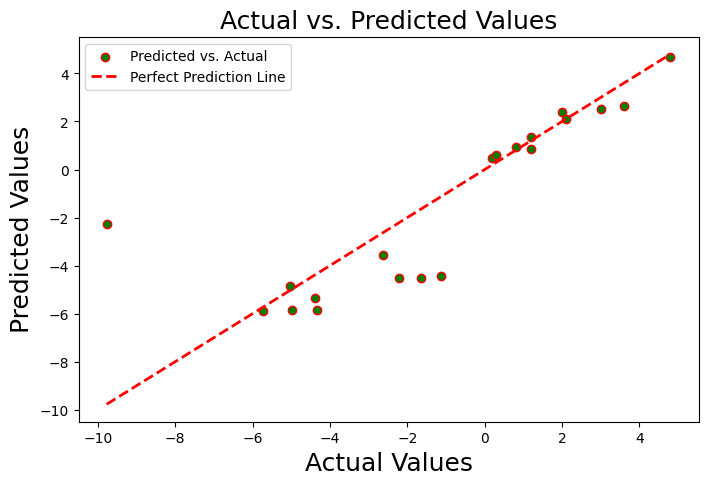

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(review['Actual Value'], review['Predicted'], color='green', label='Predicted vs. Actual', edgecolor='red')
plt.plot([review['Actual Value'].min(), review['Actual Value'].max()], [review['Actual Value'].min(), review['Actual Value'].max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Values', color = 'black', fontsize=18)
plt.ylabel('Predicted Values', color = 'black', fontsize=18)
plt.title('Actual vs. Predicted Values', color = 'black', fontsize=18)
plt.legend()
plt.show()

# Task5: Deployment with Streamlit

* Set up Streamlit
* Create an Input Interface
* Load and Use the Model
* Display Predictions
* Run and Deploy the App

In [ ]:
import pickle

filename = 'weight_predict.sav'
pickle.dump(best_model, open(filename, 'wb'))
#load the saved model
loaded_model = pickle.load(open('weight_predict.sav', 'rb'))

In [ ]:
import pickle

# Dumping the gender encoder
pickle.dump(gen_encode, open('gen_encode.pkl', 'wb'))
# Dumping the sleep quality encoder
pickle.dump(sleep_encode, open('sleep_encode.pkl', 'wb'))
# Dumping the model
pickle.dump(optimized_model, open('P_model.pkl', 'wb'))
# Dumping the tranformator
pickle.dump(pt, open('transformator.pkl', 'wb'))